In [1]:
import numpy as np
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import Tkinter, tkFileDialog
root = Tkinter.Tk()
file = tkFileDialog.askopenfile(parent=root,mode='rb',title='Choose a file')
fn = file.name
file.close()
root.destroy()

In [3]:
results=np.genfromtxt(fn,delimiter=',')

In [97]:
ch1=np.array(results[:,0])
ch2=np.array(results[:,1])
ch3=np.array(results[:,2])
ch4=np.array(results[:,3])
baseline_ch1=np.mean(ch1[np.where(ch1<.2)])
baseline_ch2=np.mean(ch2[np.where(ch1<.2)])
print baseline_ch1
print baseline_ch2
ch1_adj=ch1-baseline_ch1
ch2_adj=ch2-baseline_ch2
signal_vals_ch1=np.where(ch1_adj>.5)[0]
signal_vals_ch2=np.where(ch2_adj>.5)[0]
ch1_sign=ch1_adj[signal_vals_ch1]
ch2_sign=ch2_adj[signal_vals_ch2]

0.0163576616188
0.00126239045467


In [71]:
from scipy.signal import find_peaks_cwt

In [99]:
indexes1 = find_peaks_cwt(ch1_sign, np.arange(1,55))
indexes2 = find_peaks_cwt(ch2_sign, np.arange(1,55))
peaks1=ch1_sign[indexes1]
peaks_time1=signal_vals_ch1[indexes1]
peaks2=ch2_sign[indexes2]
peaks_time2=signal_vals_ch2[indexes2]

1.14085203397
[ 1.          1.29872734  1.16807079  1.29723048  1.46042707  1.45698158
  1.4666878   1.33231841]
[ 24488 149431 274354 399280 524204 649123 774049 898987]
[ 24363 149307 274229 399154 524078 648997 773924 898862]
[ 1.          1.06752854  1.03960244  1.06722081  1.09930947  1.09866051
  1.10048574  1.07436539]


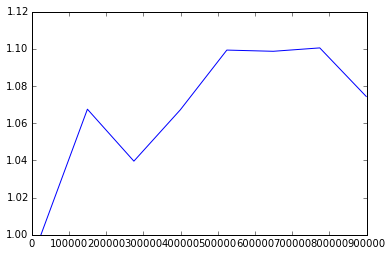

In [102]:
sig2ref=peaks1[0]/peaks2[0]
print sig2ref
Gain4=(1/sig2ref)*peaks1/peaks2
Gain=Gain4**(.25)
print Gain4
print peaks_time1
print peaks_time2
print Gain
plt.plot(peaks_time1,Gain)